In [17]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_validate, StratifiedKFold

In [18]:
X, y = load_breast_cancer(return_X_y=True)

In [32]:
cv = StratifiedKFold()
train_metrics = {}
val_metrics = {}
for train_ind, test_ind in cv.split(X, y):
    X_train, y_train = X[train_ind], y[train_ind]
    X_test, y_test = X[test_ind], y[test_ind]
    
    clf = LGBMClassifier(n_jobs=-1)
    clf.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], eval_names=['train', 'test'], verbose=-1)
    results = clf.evals_result_
    for k, v in results['train'].items():
        train_metrics[k] = train_metrics[k] + [v] if k in train_metrics else [v]
    for k, v in results['test'].items():
        val_metrics[k] = val_metrics[k] + [v] if k in val_metrics else [v]

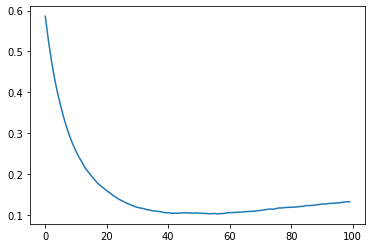

In [34]:
import matplotlib.pyplot as plt
import numpy as np
for k, v in val_metrics.items():
    plt.plot(np.mean(v, axis=0))

In [16]:
x.evals_result_